In [74]:
import pandas as pd
import numpy as np

In [3]:
data_path = "data/genie_v13.3/"

In [115]:
clinical_patient_file = "data_clinical_patient_13.3-consortium.txt"
df_clinical_patient = pd.read_csv(f"{data_path}/{clinical_patient_file}", sep="\t", skiprows=4)

clinical_sample_file = "data_clinical_sample_13.3-consortium.txt"
df_clinical_sample = pd.read_csv(f"{data_path}/{clinical_sample_file}", sep="\t", skiprows=4)

In [122]:


cna_file = "data_cna_13.3-consortium.txt"
df_cna = pd.read_csv(f"{data_path}/{cna_file}", sep="\t")

gene_matrix_file = "data_gene_matrix_13.3-consortium.txt"
df_gene_matrix = pd.read_csv(f"{data_path}/{gene_matrix_file}", sep="\t")

mutations_extended_file = "data_mutations_extended_13.3-consortium.txt"
df_mutations_extended = pd.read_csv(f"{data_path}/{mutations_extended_file}", sep="\t")

C:\Users\lucas\AppData\Local\Temp\ipykernel_55936\338504760.py:8: DtypeWarning: Columns (4,12,17,18,19,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df_mutations_extended = pd.read_csv(f"{data_path}/{mutations_extended_file}", sep="\t")


In [58]:
df_clinical_patient.head()

,PATIENT_ID,SEX,PRIMARY_RACE,SECONDARY_RACE,TERTIARY_RACE,ETHNICITY,BIRTH_YEAR,CENTER,INT_CONTACT,INT_DOD,YEAR_CONTACT,DEAD,YEAR_DEATH
0,GENIE-VICC-101416,Female,White,Not collected,Not collected,Non-Spanish/non-Hispanic,1961,VICC,19225,Not Applicable,2014,False,Not Applicable
1,GENIE-VICC-102225,Female,White,Not collected,Not collected,Non-Spanish/non-Hispanic,1982,VICC,12057,12487,2015,True,2017
2,GENIE-VICC-102424,Female,White,Not collected,Not collected,Non-Spanish/non-Hispanic,1952,VICC,23505,23625,2016,True,2016
3,GENIE-VICC-102966,Male,White,Not collected,Not collected,Non-Spanish/non-Hispanic,1951,VICC,23426,23430,2015,True,2015
4,GENIE-VICC-103244,Female,Unknown,Not collected,Not collected,Unknown,1964,VICC,18267,18311,2014,True,2014


In [106]:
def clean_year(year):
    special_cases = ["Not Collected", "Not Released", "Unknown",
                     "withheld", "cannotReleaseHIPAA", "Not Applicable", np.NaN]
    if year==">89":
        return 90
    elif year=="<18":
        return 17
    elif year in special_cases:
        return None
    else:
        return int(year)

In [116]:
df_clinical_patient["BIRTH_YEAR"] = df_clinical_patient["BIRTH_YEAR"].apply(clean_year)
df_clinical_patient["YEAR_CONTACT"] = df_clinical_patient["YEAR_CONTACT"].apply(clean_year)
df_clinical_patient["YEAR_DEATH"] = df_clinical_patient["YEAR_DEATH"].apply(clean_year)

In [117]:
df_clinical_patient["YEAR_DEATH"]

0            NaN
1         2017.0
2         2016.0
3         2015.0
4         2014.0
           ...  
146560       NaN
146561       NaN
146562       NaN
146563       NaN
146564       NaN
Name: YEAR_DEATH, Length: 146565, dtype: float64

In [118]:
df_clinical_patient["AGE_CONTACT"] = df_clinical_patient["YEAR_CONTACT"] - df_clinical_patient["BIRTH_YEAR"]
df_clinical_patient["AGE_DEATH"] = df_clinical_patient["YEAR_DEATH"] - df_clinical_patient["BIRTH_YEAR"]

In [113]:
df_clinical_patient[df_clinical_patient["AGE_DEATH"]<0]

,PATIENT_ID,SEX,PRIMARY_RACE,SECONDARY_RACE,TERTIARY_RACE,ETHNICITY,BIRTH_YEAR,CENTER,INT_CONTACT,INT_DOD,YEAR_CONTACT,DEAD,YEAR_DEATH,AGE_CONTACT,AGE_DEATH


<AxesSubplot:>

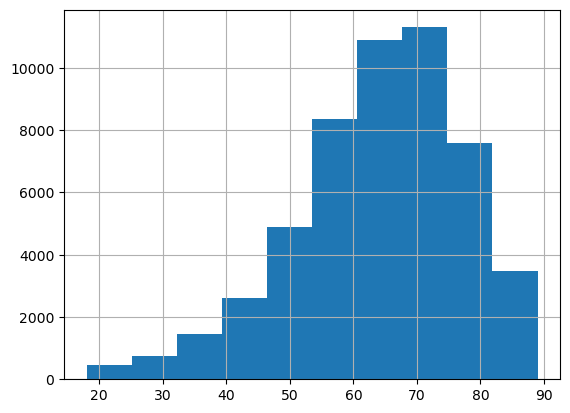

In [114]:
df_clinical_patient["AGE_DEATH"].hist()

In [80]:
df_clinical_sample["is_NF1"] = df_clinical_sample["SAMPLE_ID"].isin(df_mutations_extended[df_mutations_extended["Hugo_Symbol"]=="NF1"]["Tumor_Sample_Barcode"])
df_clinical_sample["is_NF2"] = df_clinical_sample["SAMPLE_ID"].isin(df_mutations_extended[df_mutations_extended["Hugo_Symbol"]=="NF2"]["Tumor_Sample_Barcode"])
df_clinical_sample["is_SMARCB1"] = df_clinical_sample["SAMPLE_ID"].isin(df_mutations_extended[df_mutations_extended["Hugo_Symbol"]=="SMARCB1"]["Tumor_Sample_Barcode"])
df_clinical_sample["is_LZTR1"] = df_clinical_sample["SAMPLE_ID"].isin(df_mutations_extended[df_mutations_extended["Hugo_Symbol"]=="LZTR1"]["Tumor_Sample_Barcode"])

In [5]:
df_mutations_extended.head()

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Consequence,Variant_Classification,...,FILTER,Polyphen_Prediction,Polyphen_Score,SIFT_Prediction,SIFT_Score,SWISSPROT,n_depth,t_depth,Annotation_Status,mutationInCis_Flag
0,KRAS,3845.0,JHU,GRCh37,12,25398285,25398285,+,missense_variant,Missense_Mutation,...,undefined,probably_damaging,0.991,deleterious,0.04,NaN,NaN,1623.0,SUCCESS,False
1,BRAF,673.0,JHU,GRCh37,7,140453136,140453136,+,missense_variant,Missense_Mutation,...,undefined,probably_damaging,0.963,deleterious,0.00,NaN,NaN,1031.0,SUCCESS,False
2,EGFR,1956.0,JHU,GRCh37,7,55249071,55249071,+,missense_variant,Missense_Mutation,...,undefined,probably_damaging,1.000,deleterious,0.00,NaN,NaN,692.0,SUCCESS,False
3,TP53,7157.0,JHU,GRCh37,17,7577120,7577120,+,missense_variant,Missense_Mutation,...,undefined,possibly_damaging,0.643,tolerated,0.13,NaN,NaN,930.0,SUCCESS,False
4,NRAS,4893.0,JHU,GRCh37,1,115256529,115256529,+,missense_variant,Missense_Mutation,...,undefined,benign,0.251,tolerated,0.06,NaN,NaN,2277.0,SUCCESS,False


In [123]:
df_mut_var = df_mutations_extended[["Hugo_Symbol", "Tumor_Sample_Barcode", "Variant_Type"]].copy()
df_mut_var["Hugo_Symbol_variant"] = df_mut_var["Hugo_Symbol"]+"_"+df_mut_var["Variant_Type"]
df_mut_var = df_mut_var[["Hugo_Symbol_variant", "Tumor_Sample_Barcode"]]


In [124]:
df_mut_var_pivot = pd.get_dummies(df_mut_var.set_index('Tumor_Sample_Barcode'), prefix='', prefix_sep='')

In [125]:
df_mut_var_pivot.reset_index(inplace=True)
df_mut_var_pivot = df_mut_var_pivot.rename(columns={"Tumor_Sample_Barcode":"SAMPLE_ID"})

In [126]:
df_mut_var_pivot.head()

,SAMPLE_ID,ABCB11_DEL,ABCB11_DNP,ABCB11_INS,ABCB11_ONP,ABCB11_SNP,ABCB1_DEL,ABCB1_DNP,ABCB1_ONP,ABCB1_SNP,...,ZNRF3_DNP,ZNRF3_INS,ZNRF3_ONP,ZNRF3_SNP,ZRSR2_DEL,ZRSR2_DNP,ZRSR2_INS,ZRSR2_SNP,ZSWIM4_DEL,ZSWIM4_SNP
0,GENIE-JHU-00006-00185,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,GENIE-JHU-00006-00185,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,GENIE-JHU-00006-00185,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,GENIE-JHU-00006-00185,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,GENIE-JHU-00006-00185,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
len(df_mut_var_pivot)

1410643

In [128]:
df_mut_var_pivot["SAMPLE_ID"].value_counts()

GENIE-UHN-692643-ARC2          9396
GENIE-UHN-OCT742841-ARC1       2260
GENIE-DFCI-140163-1413891      1232
GENIE-UCSF-11864-8176T         1144
GENIE-UCSF-2697-6962T           938
                               ... 
GENIE-UHN-731209-ARC1             1
GENIE-UHN-727729-ARC1             1
GENIE-UHN-727683-ARC1             1
GENIE-UHN-727093-ARC1             1
GENIE-MSK-P-0053202-T02-IM6       1
Name: SAMPLE_ID, Length: 145058, dtype: int64

In [129]:
df_mut_var[df_mut_var["Tumor_Sample_Barcode"]=="GENIE-UHN-692643-ARC2"]

,Hugo_Symbol_variant,Tumor_Sample_Barcode
932283,PRDM16_SNP,GENIE-UHN-692643-ARC2
932284,PRDM16_SNP,GENIE-UHN-692643-ARC2
932285,PRDM16_SNP,GENIE-UHN-692643-ARC2
932286,PRDM16_SNP,GENIE-UHN-692643-ARC2
932287,PRDM16_SNP,GENIE-UHN-692643-ARC2
...,...,...
941674,BCORL1_SNP,GENIE-UHN-692643-ARC2
941675,BCORL1_SNP,GENIE-UHN-692643-ARC2
941676,BCORL1_SNP,GENIE-UHN-692643-ARC2
941677,BCORL1_SNP,GENIE-UHN-692643-ARC2


In [130]:
df_mut_var_pivot[df_mut_var_pivot["SAMPLE_ID"]=="GENIE-UHN-692643-ARC2"]["FOXA1_SNP"]

932283    0
932284    0
932285    0
932286    0
932287    0
         ..
941674    0
941675    0
941676    0
941677    0
941678    0
Name: FOXA1_SNP, Length: 9396, dtype: uint8

In [132]:
cols = df_mut_var_pivot.columns

In [133]:
len(cols)

5439

In [143]:
def group_by_chunk(df_mut, col_group, n_rows):
    if len(df_mut) % n_rows != 0:
        chunks = len(df_mut)//n_rows+1
    else:
        chunks = len(df_mut) // n_rows
    df = pd.DataFrame()
    for chunk in range(chunks):
        print(f"{chunk}/{chunks}")
        df_tmp = df_mut[chunk*n_rows:chunk*n_rows+n_rows]
        df_tmp = df_tmp.groupby(col_group).max()
        df = pd.concat([df, df_tmp])
    df = df.groupby(col_group).max()
    df.reset_index(inplace=True)
    return df


In [144]:
df = group_by_chunk(df_mut_var_pivot, "SAMPLE_ID", 100000)

0/15


MemoryError: Unable to allocate 583. MiB for an array with shape (5438, 14048) and data type float64

In [140]:
len(df_mut_var_pivot)%100000

10643

In [139]:
len(df_mut_var_pivot)//100000

14

In [136]:
df_mut_var_pivot = df_mut_var_pivot.groupby("SAMPLE_ID").max()
df_mut_var_pivot.reset_index(inplace=True)
mut_var_cols = list(df_mut_var_pivot.columns)
mut_var_cols.pop(0)

MemoryError: Unable to allocate 57.2 GiB for an array with shape (5438, 1410643) and data type int64

In [120]:
len(df_mut_var_pivot)

972

In [57]:
df_mut_var_pivot[df_mut_var_pivot["SAMPLE_ID"]=="GENIE-UHN-692643-ARC2"]["FOXA1_SNP"]

907    1
Name: FOXA1_SNP, dtype: uint8

In [40]:
df_mut_var[df_mut_var["SAMPLE_ID"]=="GENIE-UHN-692643-ARC2"].describe()

,ABCB11_SNP,ABL1_DEL,ABL1_SNP,ABL2_SNP,ACVR1_SNP,ADAMTS20_DEL,AKT1_SNP,AKT3_SNP,ALK_SNP,ALOX12B_SNP,...,XPC_SNP,XPO1_SNP,ZBTB20_SNP,ZBTB7A_SNP,ZFHX3_SNP,ZFHX4_SNP,ZNF217_SNP,ZNF521_SNP,ZNF703_INS,ZNRF3_DEL
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
df_mut_var["SAMPLE_ID"].value_counts()

GENIE-COLU-00061-01            1
GENIE-MSK-P-0058354-T01-IM6    1
GENIE-MSK-P-0058855-T01-IM7    1
GENIE-MSK-P-0059357-T01-IM7    1
GENIE-MSK-P-0059461-T01-IM7    1
                              ..
GENIE-JHU-03277-03851          1
GENIE-JHU-03934-04595          1
GENIE-JHU-04514-05261          1
GENIE-JHU-04880-05684          1
GENIE-YALE-TPL718-1            1
Name: SAMPLE_ID, Length: 980, dtype: int64

In [ ]:
df_mut_var.reset_index(inplace=True)
df_mut_var = df_mut_var.rename(columns={"Tumor_Sample_Barcode":"SAMPLE_ID"})

In [ ]:
#df_mut_var = df_mut_var.drop_duplicates()
df_mut_var = pd.get_dummies(df_mut_var.set_index('Tumor_Sample_Barcode'), prefix='', prefix_sep='')
df_mut_var.reset_index(inplace=True)
df_mut_var = df_mut_var.rename(columns={"Tumor_Sample_Barcode":"SAMPLE_ID"})

In [ ]:

df_mut_var = df_mut_var.groupby("SAMPLE_ID").max()
df_mut_var.reset_index(inplace=True)
mut_var_cols = list(df_mut_var.columns)
mut_var_cols.pop(0)